# Extract deep coadds

 work with Weakly_2022_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/22
- update : 2023/12/22


In [1]:
! eups list -s | grep LOCAL

analysis_tools        LOCAL:/home/d/dagoret/repos/repos_w_2023_44/analysis_tools 	setup
atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_44/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_44/Spectractor 	setup


In [2]:
! eups list -s lsst_distrib

   g4213664e8e+d053631def 	current w_2023_44 setup


In [3]:
import lsst.daf.butler as dafButler
import lsst.daf.base as dafBase

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
import lsst.afw.table as afwTable
import lsst.geom as geom
import pprint

In [6]:
#Set the matplotlib plot color table.
plt.style.use('tableau-colorblind10')

In [7]:
# Let us also set `lsst.afw.display` to use the `matplotlib` backend:
afwDisplay.setDefaultBackend('matplotlib')
plt.rcParams['figure.figsize'] = (6.0, 6.0)

In [8]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [9]:
my_collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"

## Config

## deepCoadd

In [10]:
datasetRefs = registry.queryDatasets(datasetType='deepCoadd', collections=my_collection, where= "instrument='LATISS'")

In [11]:
all_dataId = []
all_deepcoadds  = []
all_titles = []

for i, ref in enumerate(datasetRefs):
   
    print(f"========({i})================datasetType = deepCoadd ============================================")
    print("fullId..................:",ref.dataId.full)
    print("band....................:",ref.dataId["band"])
    print("skymap..................:",ref.dataId["skymap"])
    print("tract..................:",ref.dataId["tract"])
    print("patch..................:",ref.dataId["patch"])
    print("run.....................:",ref.run)
    band = ref.dataId["band"]
    tract = ref.dataId["tract"]
    patch = ref.dataId["patch"]

    the_dataId = {'band': band, 'tract': tract, 'patch': patch}
    the_title = f"Auxtel deepCoadd : band={band}, tract={tract}, patch={patch}" 
    my_deepCoadd = butler.get('deepCoadd', dataId=ref.dataId.full,collections=my_collection)
    
    all_dataId.append(the_dataId) 
    all_deepcoadds.append(my_deepCoadd)
    all_titles.append(the_title)
    
    if i > 10:
        break

========(0)================datasetType = deepCoadd ============================================
fullId..................: {band: 'i', skymap: 'latiss_v1', tract: 452, patch: 42}
band....................: i
skymap..................: latiss_v1
tract..................: 452
patch..................: 42
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========(1)================datasetType = deepCoadd ============================================
fullId..................: {band: 'r', skymap: 'latiss_v1', tract: 3863, patch: 243}
band....................: r
skymap..................: latiss_v1
tract..................: 3863
patch..................: 243
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T163323Z
========(2)================datasetType = deepCoadd ============================================
fullId..................: {band: 'r', skym

# Select the index

In [12]:
N = len(all_deepcoadds)

for index in range(N):
    print(index,all_titles[index])


0 Auxtel deepCoadd : band=i, tract=452, patch=42
1 Auxtel deepCoadd : band=r, tract=3863, patch=243
2 Auxtel deepCoadd : band=r, tract=452, patch=63
3 Auxtel deepCoadd : band=i, tract=452, patch=43
4 Auxtel deepCoadd : band=g, tract=5615, patch=293
5 Auxtel deepCoadd : band=i, tract=455, patch=52
6 Auxtel deepCoadd : band=r, tract=455, patch=52
7 Auxtel deepCoadd : band=i, tract=10643, patch=190
8 Auxtel deepCoadd : band=g, tract=3863, patch=224
9 Auxtel deepCoadd : band=g, tract=5634, patch=74
10 Auxtel deepCoadd : band=g, tract=5634, patch=110
11 Auxtel deepCoadd : band=g, tract=10644, patch=166


In [23]:
#index= 2 problem
#index = 3 # band i, 452, 443 good
index = 4 # band g, 5615, 293, good
#index = 5 # band i, 455,52 , bad
#index = 6 # band r, 455,42, bad
#index = 7 # bad
#index = 8

In [24]:
the_dataid = all_dataId[index]
the_deepcoadd = all_deepcoadds[index]
the_title = all_titles[index]

(23799.5, 27199.5, 44799.5, 48199.5)

<Figure size 600x600 with 0 Axes>

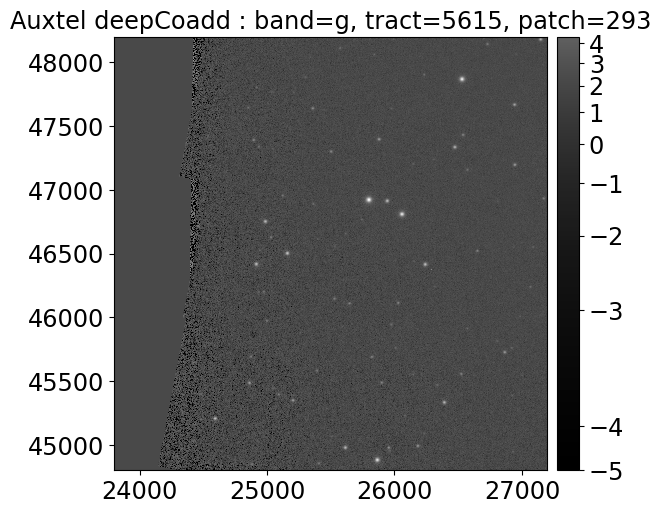

In [25]:
# Plot the calexp we just retrieved
plt.figure()
afw_display = afwDisplay.Display()
afw_display.scale('asinh', 'zscale')
afw_display.mtv(the_deepcoadd.image,title=the_title )
plt.gca().axis('on')

(14799.5, 18199.5, 5799.5, 9199.5)

<Figure size 600x600 with 0 Axes>

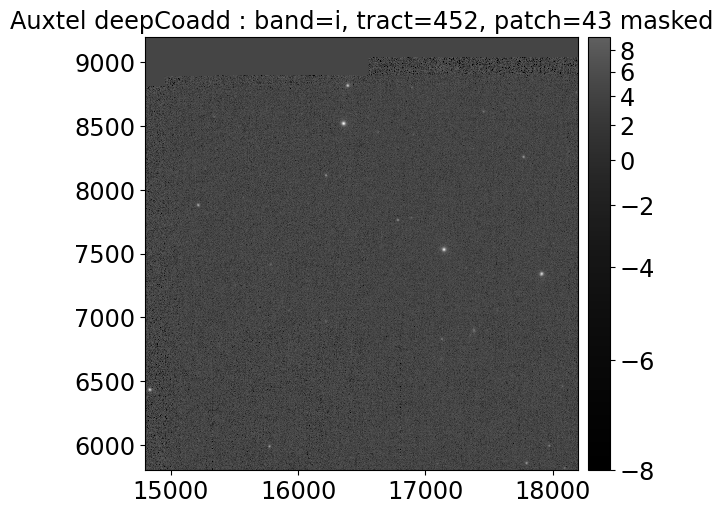

In [16]:
# Plot the calexp we just retrieved
plt.figure()
afw_display = afwDisplay.Display()
afw_display.scale('asinh', 'zscale')
afw_display.mtv(the_deepcoadd.maskedImage.image,title=the_title+" masked")
plt.gca().axis('on')

In [17]:
the_deepcoadd_md=dict(the_deepcoadd.getMetadata())

In [18]:
the_deepcoadd_md

{'EXPINFO_V': 2,
 'TTYPE1': 'COMPRESSED_DATA',
 'TFORM1': '1PB(12435)',
 'EXTNAME': 'IMAGE'}

In [19]:
ccd_ymax=the_deepcoadd.getBBox().getMaxY()
ccd_xmax=the_deepcoadd.getBBox().getMaxX()

In [20]:
the_deepcoadd.image.array.flatten()

array([ 3.1047034 ,  1.7993155 , -7.942067  , ...,  0.01046752,
        0.01046752,  0.01046752], dtype=float32)

Text(0.5, 1.0, 'Auxtel deepCoadd : band=i, tract=452, patch=43')

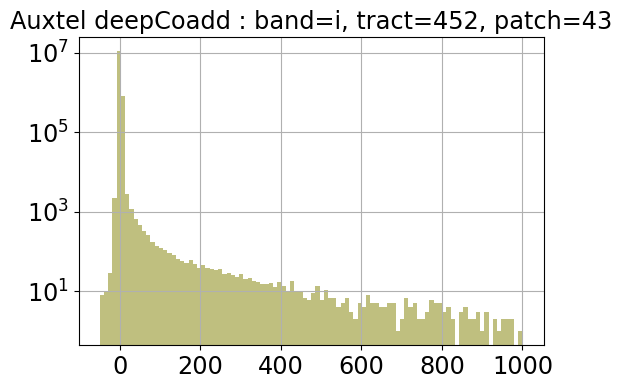

In [21]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.hist(the_deepcoadd.image.array.flatten(),bins=100,range=(-50,1000),alpha=0.5,facecolor='blue')
ax.hist(the_deepcoadd.maskedImage.image.array.flatten(),bins=100,range=(-50,1000),alpha=0.5,facecolor="yellow")
ax.set_yscale('log')
ax.grid()
ax.set_title(the_title)

In [22]:
assert False

AssertionError: 

# Detection of Sources

## Step 2: Perform image characterization and initial measurement
We now perform a base-level characterization of the image using the stack. We set some configuration settings which are specific to our sestup which has a very small optical PSF, setting a PSF size and turning off some other aspects such as cosmic ray rejection because of this.

In [ ]:
#from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask, CharacterizeImageConfig
#import lsst.meas.extensions.shapeHSM

# first set a few configs that are specific to our beam simulator data
charConfig = CharacterizeImageConfig()
#this set the fwhm of the simple PSF to that of optics
charConfig.installSimplePsf.fwhm = 10
charConfig.doMeasurePsf = False
charConfig.doApCorr = False # necessary
charConfig.repair.doCosmicRay = False  
# we do have some cosmic rays, but we also have subpixel mask features and an undersampled PSF
charConfig.detection.background.binSize = 10   # worth playing around with
#charConfig.background.binSize = 50
charConfig.detection.minPixels = 10   # also worth playing around with

# Add the HSM (Hirata/Seljak/Mandelbaum) adaptive moments shape measurement plugin
charConfig.measurement.plugins.names |= ["ext_shapeHSM_HsmSourceMoments"]
# to configure hsm you would do something like
# charConfig.measurement.plugins["ext_shapeHSM_hsmSourceMoments"].addFlux = True
# (see sfm.py in meas_base for all the configuration options for the measurement task)

# Turn off the summary statistic calculation for these spot images.
# In the future there may be a specialized task for spot images.
charConfig.doComputeSummaryStats = False

charTask = CharacterizeImageTask(config=charConfig)

#charTask.run?
# use charTask.run instead of characterize for v16.0+22
# could also perform similar functions with processCcdTask.run()

In [ ]:
# Display which plugins are being used for measurement
charConfig.measurement.plugins.active 

In [ ]:
charResult = charTask.run(postisrccd) # charTask.run(exposure) stack v16.0+22
print("Detected ",len(charResult.sourceCat)," objects ")
fig=plt.figure(figsize=(5,5))
plt.title('X/Y locations of detections')
plt.plot(charResult.sourceCat['base_SdssCentroid_x'],charResult.sourceCat['base_SdssCentroid_y'],'r.')
plt.grid()
plt.xlim(0,ccd_xmax)
plt.ylim(0,ccd_ymax)

This figure illustrates the centroids of detections made during characterization. Note that not all objects have been detected in this first round.

In [ ]:
charResult.sourceCat.asAstropy()

# Calibration and Photometry

## Step 3: Further image calibration and measurement
This builds on the exposure output from characterization, using the new mask plane as well as the source catalog. Similar to the characterization, we turn off some processing which is suited to our particular setup.  It does provide a background-subtracted image and for completeness it is included here. The steps in calibration that are turned on/off can be seen by printing the calibration config object.

In [ ]:
#from lsst.pipe.tasks.calibrate import CalibrateTask, CalibrateConfig

calConfig = CalibrateConfig()
calConfig.doAstrometry = False
calConfig.doPhotoCal = False
calConfig.doApCorr = False
calConfig.doDeblend = False   # these are well-separated objects, deblending adds time & trouble
# these images should have a uniform background, so measure it
#  on scales which are larger than the objects
calConfig.detection.background.binSize = 50
calConfig.detection.minPixels = 5
calConfig.measurement.plugins.names |= ["ext_shapeHSM_HsmSourceMoments"]
# to configure hsm you would do something like
#charConfig.measurement.plugins["ext_shapeHSM_hsmSourceMoments"].addFlux = True
calConfig.doComputeSummaryStats = True # no summary stats

calTask = CalibrateTask(config= calConfig, icSourceSchema=charResult.sourceCat.schema)

#calTask.run? # for stack v16.0+22 
calTask.run?

In [ ]:
# for stack v16.0+22, change to calTask.run(charResult.exposure)
calResult = calTask.run(charResult.exposure, background=charResult.background,
                              icSourceCat = charResult.sourceCat)


print("Detected ",len(calResult.sourceCat)," objects ")

In [ ]:
mytable = calResult.sourceCat.asAstropy()
mytable

### remove row with nan

In [ ]:
# remove row with nan
has_nan = np.zeros(len(mytable), dtype=bool)
for col in mytable.itercols():
    if col.info.dtype.kind == 'f':
        has_nan |= np.isnan(col)
mytable_no_nan = mytable[~has_nan]

### rename the columns

In [ ]:
# rename the columns
mytable_no_nan.rename_column('base_NaiveCentroid_x', 'Xpix')
mytable_no_nan.rename_column('base_NaiveCentroid_y', 'Ypix')
mytable_no_nan.rename_column('base_Blendedness_abs_child_instFlux', 'abs_chld_instFlux')
mytable_no_nan.rename_column('base_Blendedness_abs_parent_instFlux','abs_paren_instFlux')

In [ ]:
NN=len(mytable_no_nan)
values = mytable_no_nan['abs_chld_instFlux'].data
valmin = mytable_no_nan['abs_chld_instFlux'].min()
valmax = mytable_no_nan['abs_chld_instFlux'].max()
XX = mytable_no_nan['Xpix'].data
YY = mytable_no_nan['Ypix'].data
valmaxmin=valmax - valmin
index_star = mytable_no_nan['id'].data

In [ ]:
r = lambda x : (x - valmin)/valmaxmin

In [ ]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=r(valmin), vmax=r(valmax))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(r(values), alpha=1)

In [ ]:
area = 200*r(values)
dx=-50
dy=100

In [ ]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_title('X/Y locations of sources')
#ax.plot(mytable_no_nan['Xpix'],mytable_no_nan['Ypix'],'k.')
ax.scatter(mytable_no_nan['Xpix'],mytable_no_nan['Ypix'],s=area,color=all_colors)
ax.grid()
ax.set_xlim(0,ccd_xmax)
ax.set_ylim(0,ccd_ymax)

for idx in range(NN):
    ax.text(XX[idx]+dx, YY[idx]+dy, str(index_star[idx]))

In [ ]:
df_table = mytable_no_nan.to_pandas()
df_table.columns

In [ ]:
df = df_table[['id', 'coord_ra', 'coord_dec', 'Xpix','Ypix','abs_chld_instFlux'	,'abs_paren_instFlux']]
df

In [ ]:
the_max = df['abs_paren_instFlux'].describe()['max']
the_min = df['abs_paren_instFlux'].describe()['min']

In [ ]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
ax.hist(df['abs_paren_instFlux'].values,bins=50,range=(0,the_max));
ax.set_title("Flux of detected sources")
ax.set_xlabel('flux')
ax.set_ylabel('number of sources')